In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as mt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, 
                                  Lasso, LassoCV, ElasticNet, ElasticNetCV)
from sklearn.pipeline import Pipeline

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Simple Linear Regression**

In [2]:
data = pd.read_csv('data/01_salary.csv')
data.tail(3)

,Experience Years,Salary
37,9.6,112635
38,10.3,122391
39,10.5,121872


In [3]:
y = data['Salary']
X = data[['Experience Years']]

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

print(lm.intercept_, lm.coef_)
print('\npredictions   :', *[int(x) for x in predictions[:5]])
print('actual values :', *y[:5])

25673.01576053028 [9523.65050742]

predictions   : 36149 37101 38053 39958 44720
actual values : 39343 42774 46205 37731 43525


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Multiple Linear Regression**

In [4]:
data = pd.read_csv('data/02_advertising.csv')
data.tail(3)

,TV,Radio,Newspaper,Sales
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
y = data['Sales']
X = data[['TV', 'Radio', 'Newspaper']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(160, 3) (40, 3)


In [6]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(lm.intercept_, lm.coef_)
print(lm.score(X_test, y_test))    # R2

2.9948930304953336 [ 0.04458402  0.19649703 -0.00278146]
0.8601145185017868


In [7]:
print('R2   :', mt.r2_score(y_test, predictions))
print('MSE  :', mt.mean_squared_error(y_test, predictions))
print('RMSE :', mt.root_mean_squared_error(y_test, predictions))
print('MAE  :', mt.mean_absolute_error(y_test, predictions))

R2   : 0.8601145185017868
MSE  : 4.402118291449686
RMSE : 2.098122563495681
MAE  : 1.361781350209028


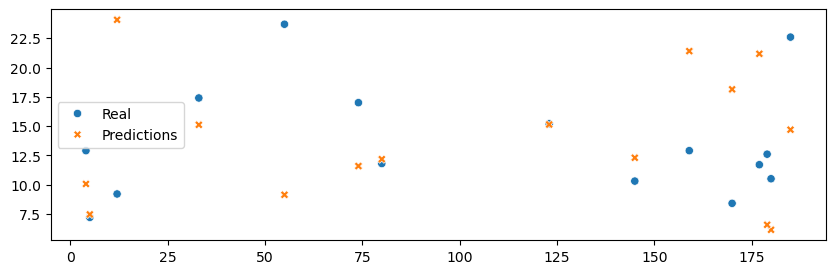

In [8]:
temp = pd.DataFrame({
    'Real': y_test.sort_index(),
    'Predictions': predictions
})

plt.figure(figsize=(10,3))
sns.scatterplot(temp.sample(15))
plt.legend(loc='best')
plt.show()
del temp

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [9]:
data = sns.load_dataset('tips')
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [10]:
categories = data.select_dtypes(include='category')
data = pd.get_dummies(data, columns=categories.columns, 
                      drop_first=True, dtype='int')
data.head(3)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1


In [11]:
y = data['tip']
X = data.drop(columns='tip')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# print(lm.intercept_, lm.coef_)

In [13]:
print('R2   :', mt.r2_score(y_test, predictions))
print('MSE  :', mt.mean_squared_error(y_test, predictions))
print('RMSE :', mt.root_mean_squared_error(y_test, predictions))
print('MAE  :', mt.mean_absolute_error(y_test, predictions))

R2   : 0.5545031052534986
MSE  : 0.8939195221609504
RMSE : 0.9454731736865676
MAE  : 0.7080218832979787


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Cross Validation**

In [14]:
k = 5
cv = KFold(n_splits=k,)
lm_cv = LinearRegression()

_r2, _mse = [], []

for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model = lm_cv.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2  = mt.r2_score(y_test, predictions)
    mse = mt.mean_squared_error(y_test, predictions)
    
    # print('Iteration :', i)
    # print(str('\tR2').ljust(10), ':', r2)
    # print(str('\tMSE').ljust(10), ':', mse)

    _r2.append(r2)
    _mse.append(mse)

print('Average R2  :', np.mean(r2))
print('Average MSE :', np.mean(mse))

Average R2  : 0.37843166676204587
Average MSE : 1.4006058239656338


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Polynomial Regression**

In [15]:
data = sns.load_dataset('tips')
categories = data.select_dtypes(include='category')
data = pd.get_dummies(data, columns=categories.columns, 
                      drop_first=True, dtype='int')
data.head(3)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1


In [16]:
y = data['tip']
X = data.drop(columns='tip')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pm = LinearRegression()
pm.fit(X_train_poly, y_train)
predictions = pm.predict(X_test_poly)

print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

R2  : 0.3901142641041607
MSE : 1.223776803012317


In [18]:
_pm = Pipeline([('poly', PolynomialFeatures(degree=2)),
                ('linear', LinearRegression())])

_pm.fit(X_train, y_train)            # NOT X_poly
_predictions = _pm.predict(X_test)

print('R2  :', mt.r2_score(y_test, _predictions))
print('MSE :', mt.mean_squared_error(y_test, _predictions))

R2  : 0.3901142641041607
MSE : 1.223776803012317


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**- THIS DATA WILL BE USED FOR THE REMAINING PART -**

In [19]:
data = pd.read_csv('data/03_boston.csv')
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [20]:
y = data['MEDV']
X = data.drop(columns='MEDV')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Ridge Regression**

In [21]:
rm = Ridge(alpha=0.1)    # alpha = lambda
rm.fit(X_train, y_train)
predictions = rm.predict(X_test)

# print(rm.intercept_, rm.coef_) # shown in the table at the end
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

R2  : 0.5880003503393509
MSE : 33.548488365916015


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

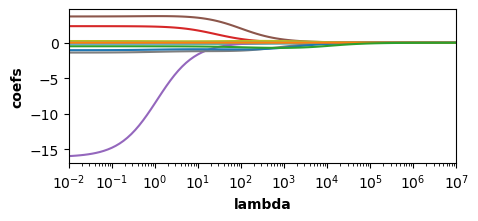

In [22]:
coefs = []
lambdas = 10**np.linspace(-2, 7, 100)

for i in lambdas:
    _rm = Ridge(alpha=i)
    _rm.fit(X_train, y_train)
    coefs.append(_rm.coef_)

plt.plot(lambdas, coefs)
plt.xscale('log')
plt.xlim(1e-2, 1e7)

plt.xlabel('lambda', fontweight='bold')
plt.ylabel('coefs', fontweight='bold')
plt.gcf().set_size_inches(5,2)
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Ridge Regression Cross Validation**

In [23]:
lambdas = 10**np.linspace(10, -2, 100) * 0.5

rm_cv = RidgeCV(alphas=lambdas, scoring='r2')
rm_cv.fit(X_train, y_train)
predictions = rm_cv.predict(X_test)

print(rm_cv.alpha_) #best alpha

# print(rm_cv.intercept_, rm_cv.coef_)
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

0.0466301673441609
R2  : 0.5886495182431993
MSE : 33.49562763681655


In [24]:
# rm = Ridge(alpha=rm_cv.alpha_) # NO NEED - rm_cv IS A VALID MODEL LIKE rm

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Lasso Regression**

In [25]:
lm = Lasso(alpha=0.1)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# print(lm.intercept_, lm.coef_) # shown in the table at the end
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

R2  : 0.5569747742783787
MSE : 36.0748525955572


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Lasso Regression Cross Validation**

In [26]:
lm_cv = LassoCV(cv=10, max_iter=10000)
lm_cv.fit(X_train, y_train)
predictions = lm_cv.predict(X_test)

print(lm_cv.alpha_)

# print(lm_cv.intercept_, lm_cv.coef_)
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

0.8046610185275953
R2  : 0.5099613813375952
MSE : 39.90307979772893


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**ElasticNET Regression**

In [27]:
em = ElasticNet(alpha=0.1)
em.fit(X_train, y_train)
predictions = em.predict(X_test)

# print(em.intercept_, em.coef_) # shown in the table at the end
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

R2  : 0.5546438733443804
MSE : 36.26465422022061


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**ElasticNET Regression Cross Validation**

In [28]:
em_cv = ElasticNetCV(cv=10, max_iter=10000)
em_cv.fit(X_train, y_train)
predictions = em_cv.predict(X_test)

print(em_cv.alpha_)

# print(em_cv.intercept_, em_cv.coef_)
print('R2  :', mt.r2_score(y_test, predictions))
print('MSE :', mt.mean_squared_error(y_test, predictions))

1.6093220370551906
R2  : 0.4770920830273523
MSE : 42.57957545219193


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**MODEL INTERCEPTS AND COEFFICIENTS**

In [29]:
li = LinearRegression().fit(X_train, y_train)

_li = list(li.coef_); _li.insert(0, li.intercept_)
_rm = list(rm.coef_); _rm.insert(0, rm.intercept_)
_lm = list(lm.coef_); _lm.insert(0, lm.intercept_)
_em = list(em.coef_); _em.insert(0, em.intercept_)

temp = pd.DataFrame([_lm, _rm, _lm, _em])
temp.index = ['Linear', 'Ridge', 'Lasso', 'ElasticNET']
temp.columns = [f'β{i}' for i in temp.columns]
temp

,β0,β1,β2,β3,β4,β5,β6,β7,β8,β9,β10,β11,β12,β13
Linear,28.510756,-0.111247,0.047784,-0.043241,0.842320,-0.000000,3.594824,-0.014483,-1.111749,0.206671,-0.012868,-0.892662,0.009120,-0.525479
Ridge,37.176545,-0.118983,0.044977,0.000411,2.336109,-14.812614,3.719342,-0.004407,-1.367900,0.240226,-0.011077,-1.032485,0.008184,-0.493652
Lasso,28.510756,-0.111247,0.047784,-0.043241,0.842320,-0.000000,3.594824,-0.014483,-1.111749,0.206671,-0.012868,-0.892662,0.009120,-0.525479
ElasticNET,32.266468,-0.111518,0.050656,-0.052591,0.938723,-0.000000,3.135558,-0.012025,-1.140558,0.219134,-0.013240,-0.910361,0.008782,-0.555177


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>